<a href="https://colab.research.google.com/github/pcashman21/feral-cat-census/blob/main/src/notebooks/cluster_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = '/content/gdrive/My Drive/Cat images/cluster_test_data/'
image_1 = '00000500_001.jpg'
image_2 = '00000500_003.jpg'
image_3 = '00000500_005.jpg'
image_4 = '00000500_008.jpg'
image_5 = '00000500_010.jpg'

In [45]:
test_case_folder = 'case_2/'

In [46]:
test_case_images = []
with os.scandir(path + test_case_folder) as files:
  for file in files:
    test_case_images.append(file.name)

In [7]:
INPUT_SHAPE = (224,224, 3) ## Pixel size of images, in each of 3 channels
IMG_SIZE = INPUT_SHAPE[:2]
IMG_SIZE

(224, 224)

In [8]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 6s 0us/step


In [14]:
def extract_features(file, model, img_size=IMG_SIZE):
    # load the image as a 224x224 array
    img = load_img(file, target_size=img_size)
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = np.expand_dims(img, axis=0)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

1/1 [==============================] - 1s 806ms/step


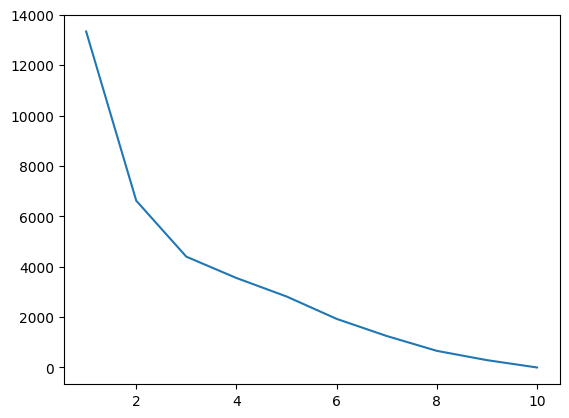

In [56]:
# Get all files in a test case folder
test_case_folder = 'case_5/'
test_case_images = []
with os.scandir(path + test_case_folder) as files:
  for file in files:
    test_case_images.append(file.name)

# Extract the features from each test case image
data = {}
for test_case in test_case_images:
  feature = extract_features(path + test_case_folder + test_case, model)
  data[test_case] = feature

# Get list of filenames
filenames = np.array(list(data.keys()))
# Get a list of just the features
feat = np.array(list(data.values()))
feat = feat.reshape(-1,4096)

x_values = []
y_values = []

pca = PCA(n_components=len(filenames), random_state=22)
pca.fit(feat)

for i in range(len(filenames)):
  kmeans = KMeans(n_clusters=i+1, n_init='auto', random_state=22)
  #print(f'n_clusters: {i+1}, x.shape: {x.shape}')
  x = pca.transform(feat)
  kmeans.fit(x)
  x = x_values.append(i+1)
  y = y_values.append(kmeans.inertia_)
plt.plot(x_values, y_values)
